# Analysis

This notebook includes the analysis of bike rentals and accidents in NYC, 2023 based on data provided from Citibike and NYPD.

We first import packages (1) and relevant data (2). Then, we perform an initial analysis of CitiBike data (3), followed by initial analysis of police data (4). We wrap it up by a calculating a cooperation offer for AXA + CitiBike (5).

General note: First insights and interpretation are expressed either in a cell as note, or in a markdown as fluent text.

## 1 Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 2 Import pre-processed data

In [2]:
# If not already done, run ```2_scripts/0_preprocess-citibike-data.py``` and ```2_scripts/1_preprocess-police-data.py``` first.

# Load preprocessed data
df_c = pd.read_csv("../0_data/_preprocessed-data/citibike_2023.csv")
df_p = pd.read_csv("../0_data/_preprocessed-data/police_2023.csv")

## 3 Initial analysis of Citibike data

#### 3.1 Most bike rides by Citibike members

In [3]:
# Calculate key total numbers from data set

# total number of rides
tot_rides = len(df_c)

# total number of rides by bike type
tot_rideable_type = df_c.value_counts("rideable_type")
# total number of rides by electric bike
tot_rides_electric_bike = tot_rideable_type.iloc[0]
# total number of rides by classic bike
tot_rides_classic_bike = tot_rideable_type.iloc[1]

# total number of rides by members or non-members (casuals)
tot_member_casual = df_c.value_counts("member_casual")
# total number of rides by members
tot_rides_member = tot_member_casual.iloc[0]
# total number of rides by non-members (casuals)
tot_rides_casual = tot_member_casual.iloc[1]

# Initiate dataframe to store all total values for analysis report
df_analysis_tot_c = pd.DataFrame({
    "metric": [
        "tot_rides",
        "tot_rides_electric_bike",
        "tot_rides_classic_bike",
        "tot_rides_member",
        "tot_rides_casual"
    ],
    "value": [
        tot_rides,
        tot_rides_electric_bike,
        tot_rides_classic_bike,
        tot_rides_member,
        tot_rides_casual
    ]
})

In [4]:
# Calculate key share numbers from data set

# Share of electric bike rides
share_rides_electric_bike = tot_rides_electric_bike / tot_rides
# Share of classic bike rides
share_rides_classic_bike = 1 - share_rides_electric_bike 
# Share of member rides
share_rides_member = tot_rides_member / tot_rides
# Share of casual rides (non-members)
share_rides_casual = 1 - share_rides_member

# Initiate dataframe to store all share values for analysis report
df_analysis_share_c = pd.DataFrame({
    "metric": [
        "share_rides_electric_bike",
        "share_rides_classic_bike",
        "share_rides_member",
        "share_rides_casual"
    ],
    "value": [
        share_rides_electric_bike,
        share_rides_classic_bike,
        share_rides_member,
        share_rides_casual
    ]
})

In [5]:
df_analysis_tot_c

,metric,value
0,tot_rides,35106986
1,tot_rides_electric_bike,17605824
2,tot_rides_classic_bike,17501162
3,tot_rides_member,28513791
4,tot_rides_casual,6593195


In [6]:
df_analysis_share_c

,metric,value
0,share_rides_electric_bike,0.501491
1,share_rides_classic_bike,0.498509
2,share_rides_member,0.812197
3,share_rides_casual,0.187803


In [7]:
# ### First interpretation
# 1. Main categories in rides are a) bike type: electric vs. classical bike b) membership: member vs. non-member (casual) user
# 2. Nearly 50-50 rides with electric vs. classical bike
# 3. More member bike rides, than casual (non-member) bike rides (Probably members = commuters/locals, to be checked in 3.3)

# ### Implications for insurance
# 1. Members are main group to insure, since they make up most of the rides
# 2. Consider different insurance package for bikes vs. classical bikes, because electrical bikes are faster than classical bikes, and potentially lead to longer rides
# 3. Consider different insurance package for members vs. non-members, because of frequency/share of rides

#### 3.2 Most bike rides in summer

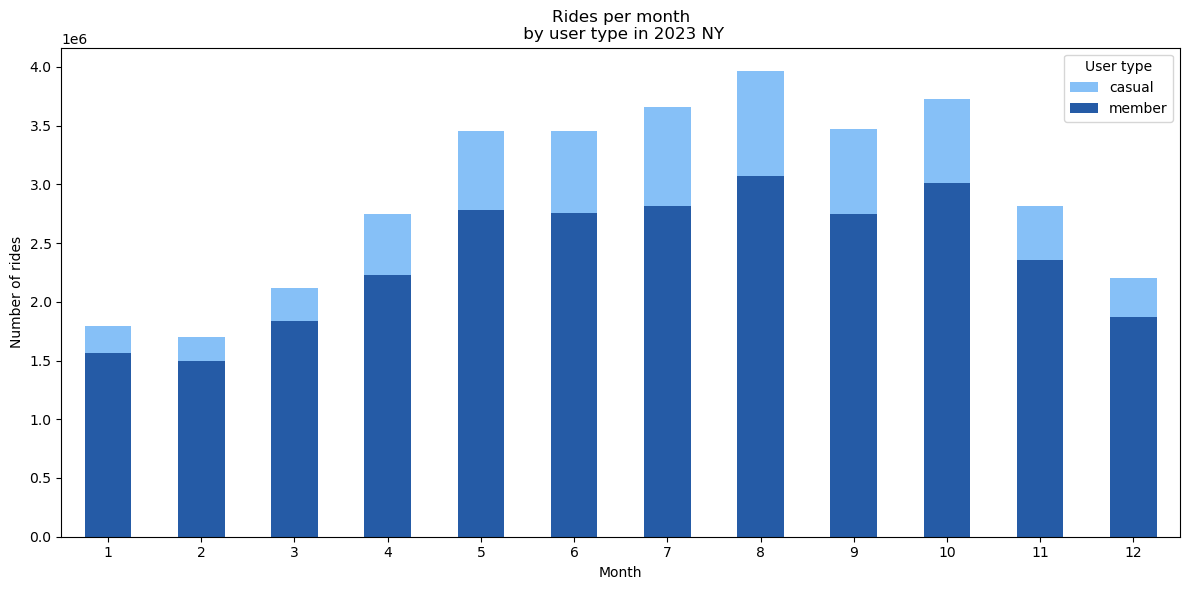

In [8]:
# Group by month and user type
rides_per_month = df_c.groupby(["month", "member_casual"]).size().unstack(fill_value=0)

# Reorder columns so 'member' comes first (bottom) and 'casual' second (top)
rides_per_month = rides_per_month[["member", "casual"]]

# Plot stacked bar chart
rides_per_month.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    color={"casual": "#86C0F7", "member": "#255BA6"}
)

# Set legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title="User type")

plt.xlabel("Month")
plt.ylabel("Number of rides")
plt.title("Rides per month\n by user type in 2023 NY")
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

In [9]:
# ### First interpretation
# 1. More bike rides in summer, less in winter - both for members and non-members
# 2. Non-members are more seasonal than members (e.g., Non-members 200k in January --x4--> +800k in August, while members 1.5M in January --x2--> 3M in August)
# 3. Again, rides from members make up the majority of rides – at any time!

# ### Implications for insurance
# 1. Consider marketing of insurance during peak summer season
# 2. Consider different risk profile depending on season (winter = ice on the roads)

#### 3.3 Members commute most during rush hours

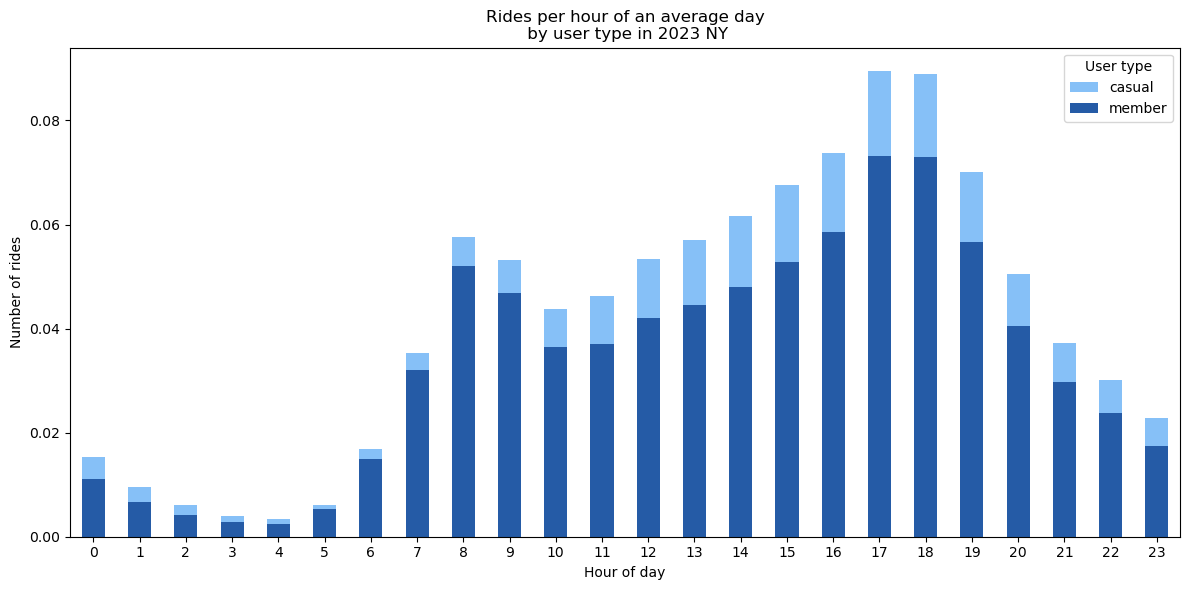

In [10]:
# Count and normalize rides per hour & user type
rides_per_hour = df_c.groupby(["hour", "member_casual"]).size().unstack(fill_value=0) / len(df_c) ######### to be checked 

# Reorder columns so casual first, member second (legend order)
rides_per_hour = rides_per_hour[["member", "casual"]]

# Plot stacked bar chart
rides_per_hour.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    color={"casual": "#86C0F7", "member": "#255BA6"}
)

# Set legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], title="User type")

plt.xlabel("Hour of day")
plt.ylabel("Number of rides")
plt.title("Rides per hour of an average day\n by user type in 2023 NY")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [11]:
# ### First interpretation
# 1. Reasonal assumption: Casual rides = mainly tourists, member rides = mainly locals aka commuters
# 2. Peaks in rides around 8 o'clock and 17 o'clock dominated by members (the locals commuting to their job)

# ### Implications for insurance
# 1. Most bike rides by members around rush hours, means even more risk for traffic accidents, since also cars are on the road (to be checked with police data in 5)
# 2. Maybe consider real time warning system at rush hours in citibike app

## 4 Initial analysis of police data

#### 4.1 Bike accidents lead to injuries or even death in 64%

In [12]:
# Total number of accidents
tot_accidents = len(df_p)
# Total number of people killed in accidents
tot_death = sum(df_p["NUMBER OF PERSONS KILLED"])
# Total number of people injured in accidents
tot_injured = sum(df_p["NUMBER OF PERSONS INJURED"])
# Total number of cyclists killed
tot_death_cyclists = sum(df_p["NUMBER OF CYCLIST KILLED"])
# Total number of cyclists injured
tot_injured_cyclists = sum(df_p["NUMBER OF CYCLIST INJURED"])
# Total number of accidents with cyclists involved (including killed or injured) in accident
tot_accidents_cyclists = df_p["BICYCLE INVOLVED"].sum()

# Initiate dataframe to store all total values for analysis report
df_analysis_tot_p = pd.DataFrame({
    "metric": [
        "tot_accidents",
        "tot_death",
        "tot_injured",
        "tot_death_cyclists",
        "tot_injured_cyclists",
        "tot_accidents_cyclists"
    ],
    "value": [
        tot_accidents,
        tot_death,
        tot_injured,
        tot_death_cyclists,
        tot_injured_cyclists,
        tot_accidents_cyclists
    ]
})

df_analysis_tot_p = df_analysis_tot_p.astype({"value": "Int64"})

In [13]:
# Share of deaths per accident
share_death_per_accident = tot_death / tot_accidents
# Share of accidents with biked involved
share_accidents_bike = tot_accidents_cyclists / tot_accidents
# Share of dead cyclists out of bike accidents
share_death_bike_accidents = tot_death_cyclists / tot_accidents_cyclists
# Share injured cyclists out of bike accidents
share_injured_bike_accidents = tot_injured_cyclists / tot_accidents_cyclists

# Initiate dataframe to store all share values for analysis report
df_analysis_shares = pd.DataFrame({
    "metric": [
        "share_death_per_accident",
        "share_accidents_bike",
        "share_death_bike_accidents",
        "share_injured_bike_accidents"
    ],
    "value": [
        share_death_per_accident,
        share_accidents_bike,
        share_death_bike_accidents,
        share_injured_bike_accidents
    ]
})

In [14]:
df_analysis_tot_p

,metric,value
0,tot_accidents,96606
1,tot_death,280
2,tot_injured,54252
3,tot_death_cyclists,31
4,tot_injured_cyclists,5178
5,tot_accidents_cyclists,8161


In [15]:
df_analysis_shares

,metric,value
0,share_death_per_accident,0.002898
1,share_accidents_bike,0.084477
2,share_death_bike_accidents,0.003799
3,share_injured_bike_accidents,0.634481


In [16]:
factor_cols = ["CONTRIBUTING FACTOR VEHICLE 1","CONTRIBUTING FACTOR VEHICLE 2","CONTRIBUTING FACTOR VEHICLE 3","CONTRIBUTING FACTOR VEHICLE 4","CONTRIBUTING FACTOR VEHICLE 5"]

# stack all values into one Series
factors = df_p[factor_cols].stack()

# drop NaNs and count occurrences
factor_counts = factors.dropna().value_counts()

# get top 10
factor_counts.head(10)

Unspecified                       96840
Driver Inattention/Distraction    28646
Following Too Closely              7512
Failure to Yield Right-of-Way      7208
Passing or Lane Usage Improper     5075
Unsafe Speed                       4427
Other Vehicular                    4257
Passing Too Closely                3660
Traffic Control Disregarded        3449
Backing Unsafely                   3057
Name: count, dtype: int64

In [ ]:
# ### First insights
# 1. 8.5 % of all accidents in NY involve a cyclist
# 2. 64% of these accidents involve a cyclists being injured - or dead
# 3. Some of the main reasons for accidents are driver inattention, failure to yield right-of-way, or passing improperly. Alls reasing get more complex since more and more variants of vehicles participate in traffic

# ### Implications for insurance
# 1. Insure for injuries mainly, but also include probability of death
# 2. Do marketing with the key numbers of accidents / injuries

#### 4.2 Most bike accidents happen in summer

In [18]:
# dataframe only bike accidents
df_bikes = df_p[df_p["BICYCLE INVOLVED"]]

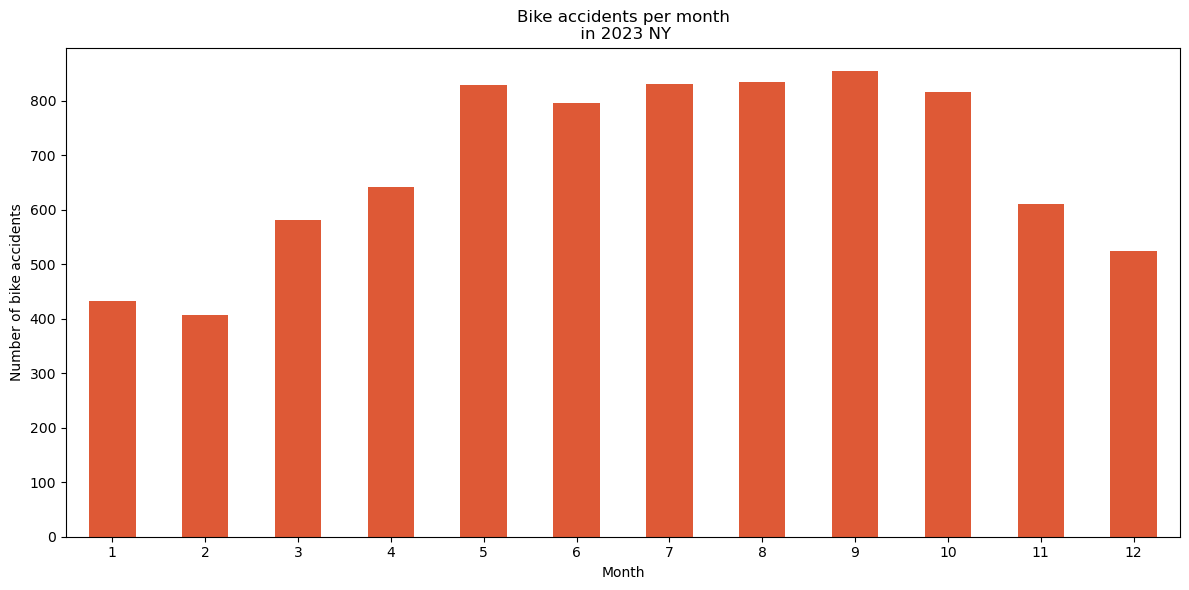

In [19]:
# group by month and count accidents
bike_accidents_by_month = df_bikes.groupby("month").size()

# Plot stacked bar chart
bike_accidents_by_month.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    color="#DE5936"
)

plt.xlabel("Month")
plt.ylabel("Number of bike accidents")
plt.title("Bike accidents per month\n in 2023 NY")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [20]:
# ### First interpretation
# 1. More bike accidents in summer, less in winter (because there are more bike rides due to weather and tourists)
# 2. In winter there is a higher risk of ice on the road and thus additional risk for accidents

#### 4.3 Most accidents during rush hours or from night life

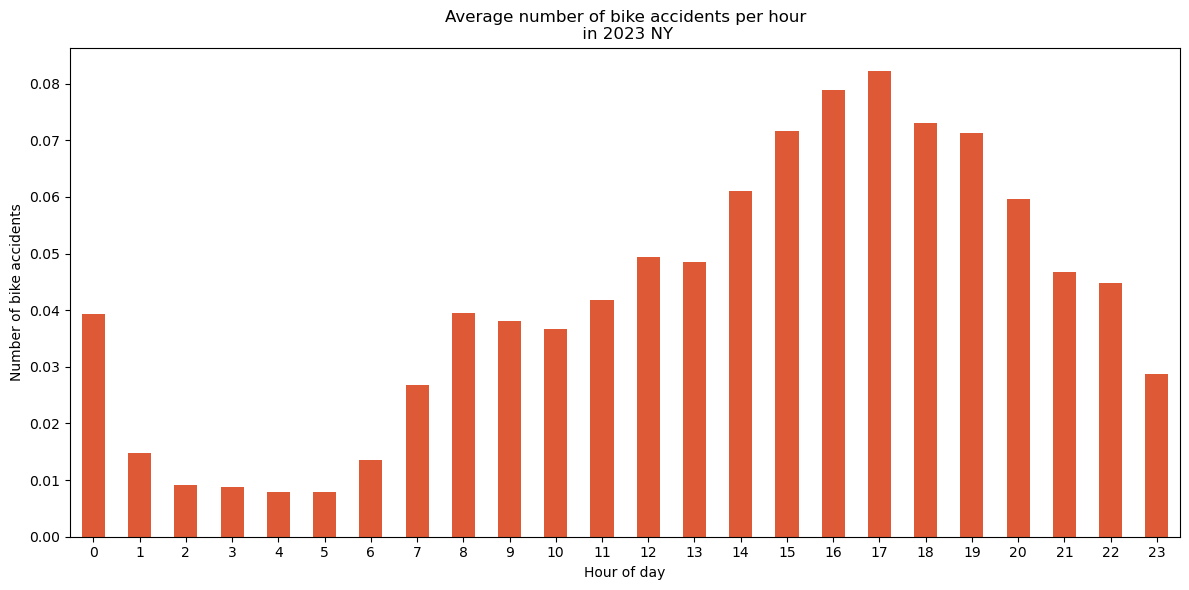

In [21]:
# Count and normalize rides per hour & user type
bike_accidents_by_hour = df_bikes.groupby("hour").size() / len(df_bikes)

# Plot stacked bar chart
bike_accidents_by_hour.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    color="#DE5936"
)

plt.xlabel("Hour of day")
plt.ylabel("Number of bike accidents")
plt.title("Average number of bike accidents per hour\n in 2023 NY")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [22]:
# ### First insights
# 1. Most bike accidents happen around 17 o'clock
# 2. Other peak hours for bike accidents are 8 o'clock and midnight
# 3. Interpretation: Most accidents during rush hour due to commuters, or at midnight due to drunk or tired cyclists (night life)

## 5 Calculation for cooperation offer

In [ ]:
#### Assumptions ####
# Cost for average injury
avg_cost_per_case = 8000
# Share of people that rent their bike out of all people that use their bike
share_bicyclists_rent = 0.5
# Share of people that rent their bike at Citibike out of all share_byclists_rent 
share_citibike = 0.25
# Assume a member commutes 300 days a year twice a day
rides_per_member_year = 300 * 2
# Profit margin
margin = 0.1

#### Calculation of monthly premium for members ####
# Total number of bike injuries that we need to cover by the insurance ("case")
tot_cases = tot_injured_cyclists * share_bicyclists_rent * share_citibike
# Exepcted cost per year
expected_cost = tot_cases * avg_cost_per_case

# Estimated total number of members
members = tot_rides_member / rides_per_member_year
# Minimal monthly premium per member
min_premium = expected_cost / (12 * members)
# Let's assume a 10% margin
monthly_premium = round(min_premium * (1 + margin))

print("Monthly premium for members is", monthly_premium, "$")

Monthly premium for members is 10 $


**Offer:**

AXA cooperates with Citibike by providing an accident and liability insurance for the Citibike users. The details are as follows:
- Insurance covers costs arising from accidents (e.g., transportation to nearest hospital) to a total of 25k Dollar
- Insurance is voluntary and costs 10 Dollar per month per member, or 3 Dollar per ride for non-members
- 30% out of profit margin for Citibike, 70% for AXA